<a href="https://colab.research.google.com/github/Ramadhan1212/MachineLearning/blob/main/QUIZ_4_MESIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DECISION TREE

In [24]:
# library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
url = "https://raw.githubusercontent.com/Ramadhan1212/Semester6/main/PMesin/PRAKTIKUM/CO2%20Emissions_Canada.csv"
df = pd.read_csv(url)

df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [26]:
# informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [27]:
# count - Jumlah nilai yang tidak kosong. mean - Nilai rata-rata. std - Standar deviasi.
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [28]:
# menampilkan kolom
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [29]:
# initialize
df.columns = ['make', 'model','class','engine','cylinders','transmission', 'fueltype', 'consumpcity', 'consumphwy', 'consumpcomb', 'consumpcombmpg', 'emissions']
df.head()

,make,model,class,engine,cylinders,transmission,fueltype,consumpcity,consumphwy,consumpcomb,consumpcombmpg,emissions
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


# DATA SELECTION

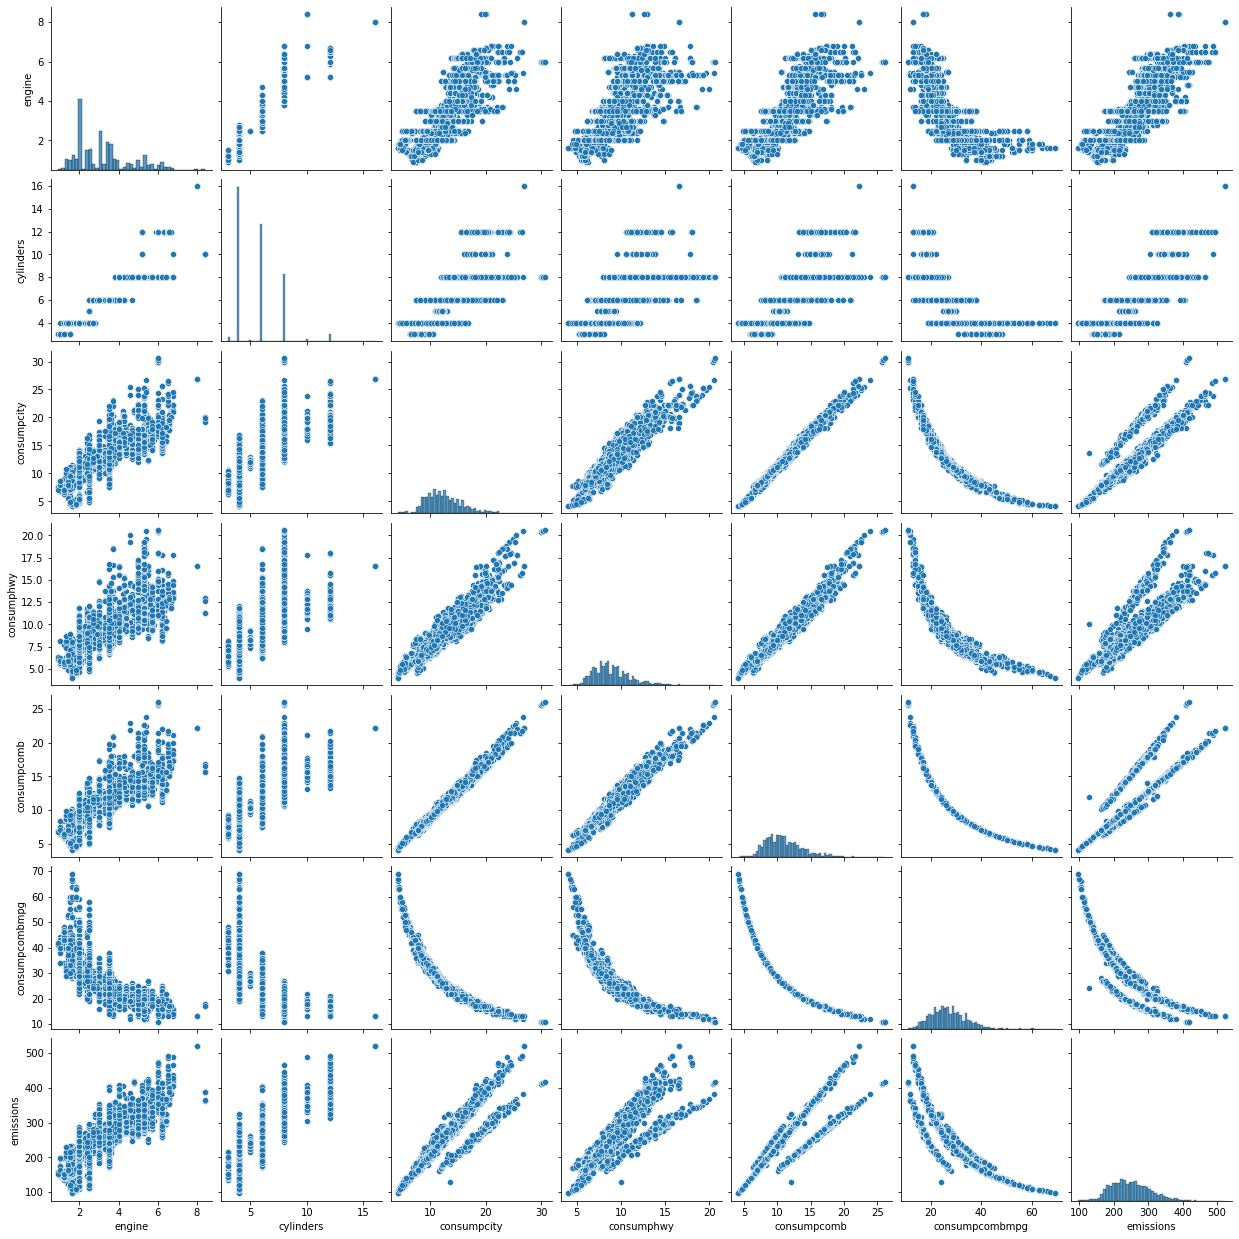

In [30]:
# membuat sumbu sedemikian rupa 
# sehingga setiap variabel dalam data 
# akan dibagi di sumbu y di satu baris dan di sumbu x di satu kolom.
sns.pairplot(df)

In [31]:
df_sel = df[['make', 'model','class', 'transmission','fueltype', 'engine', 'cylinders','consumpcomb','emissions']]
df_sel.describe()

,engine,cylinders,consumpcomb,emissions
count,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,10.975071,250.584699
std,1.354170,1.828307,2.892506,58.512679
min,0.900000,3.000000,4.100000,96.000000
25%,2.000000,4.000000,8.900000,208.000000
50%,3.000000,6.000000,10.600000,246.000000
75%,3.700000,6.000000,12.600000,288.000000
max,8.400000,16.000000,26.100000,522.000000


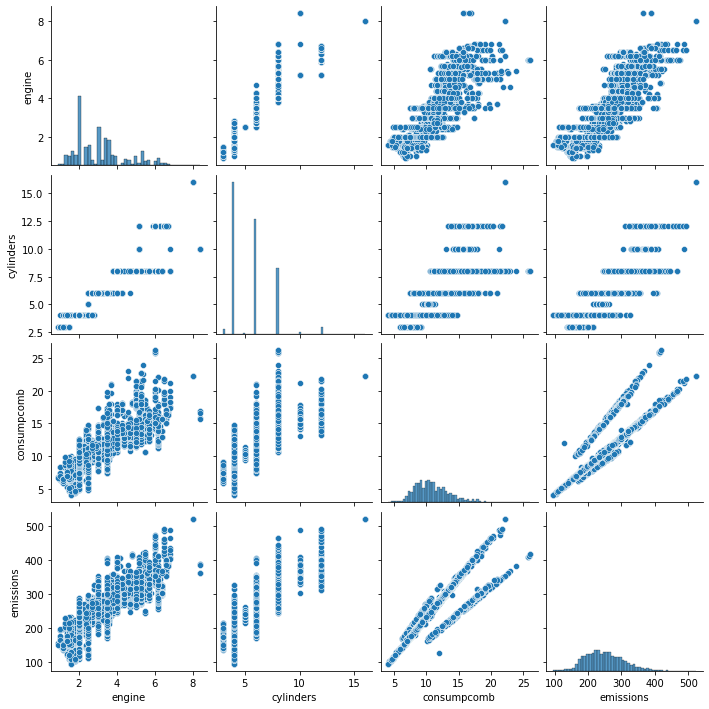

In [32]:
sns.pairplot(df_sel)

Grafik di bawah menggambarkan hubungan antara konsumsi bahan bakar dan emisi. Semakin tinggi konsumsi bahan bakar semakin tinggi emisi. Namun, bahan bakar tipe E (Etanol) memiliki emisi yang lebih rendah dibandingkan bahan bakar jenis lain, sedangkan bahan bakar tipe D (Diesel) memiliki emisi yang lebih tinggi.

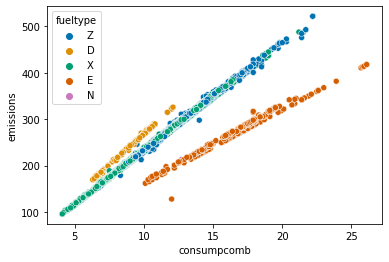

In [33]:
sns.set_palette('colorblind')
sns.scatterplot(y = 'emissions', x = 'consumpcomb', data = df_sel, hue = 'fueltype')

Grafik di bawah ini menunjukkan semakin besar kapasitas mesin semakin tinggi emisi, dan mesin yang memiliki lebih banyak silinder mengeluarkan lebih banyak emisi.

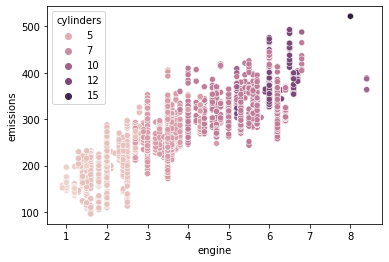

In [34]:
sns.scatterplot(y = 'emissions', x = 'engine', data = df_sel, hue = 'cylinders')

# Preprocessing

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scala = df_sel[['engine','consumpcomb', 'cylinders', 'emissions']]
df_scala = pd.DataFrame(scaler.fit_transform(df_scala), columns = df_scala.columns)

In [39]:
from sklearn.model_selection import train_test_split

X = df_scala[['engine','consumpcomb', 'cylinders']]
y = df_scala['emissions']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1)

# Linear Regression

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
lr = LinearRegression().fit(X_train, y_train)

y_pred = lr.predict(X_test)

lr_score = r2_score(y_test, y_pred)
lr_rmse = mean_squared_error(y_test, y_pred, squared = False)
print("Coefficients: ", lr.coef_)
print("Intercept: ", lr.intercept_)
print("R2 Score : ", lr_score)
print("RMSE : ", lr_rmse)

Coefficients:  [0.0971306  0.68223182 0.20225552]
Intercept:  0.0796190519522671
R2 Score :  0.878563586733978
RMSE :  0.04762914915912338


Dari scatterplot di cell [14], grafik menunjukkan hubungan linier. Namun, bahan bakar jenis diesel dan etanol terlihat terpisah. Jadi, saya mencoba menggunakan Decision Tree and Random Forest.

In [43]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor().fit(X_train, y_train)

y_pred = dtr.predict(X_test)

dtr_score = r2_score(y_test, y_pred)
dtr_rmse = mean_squared_error(y_test, y_pred, squared = False)
print("R2 Score : ", dtr_score)
print("RMSE : ", dtr_rmse)

R2 Score :  0.9743873196636427
RMSE :  0.021873882369494228


In [44]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor().fit(X_train, y_train)

y_pred = rfr.predict(X_test)

rfr_score = r2_score(y_test, y_pred)
rfr_rmse = mean_squared_error(y_test, y_pred, squared = False)
print("R2 Score : ", rfr_score)
print("RMSE : ", rfr_rmse)

R2 Score :  0.979316315911838
RMSE :  0.01965677676894825


In [45]:
log = pd.DataFrame({
    'Name' : ['Linear Regression', 'Decision Tree', 'RandomForestRegressor'],
    'R2 Score' : [lr_score, dtr_score, rfr_score],
    'RMSE' : [lr_rmse, dtr_rmse, rfr_rmse]
})
log

,Name,R2 Score,RMSE
0,Linear Regression,0.878564,0.047629
1,Decision Tree,0.974387,0.021874
2,RandomForestRegressor,0.979316,0.019657


(0.0, 1.0)

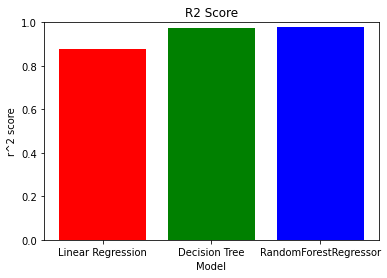

In [46]:
plt.title('R2 Score')
plt.bar(log['Name'], log['R2 Score'], color = ['r','g','b','y'])
plt.xlabel('Model')
plt.ylabel('r^2 score')
plt.ylim(0, 1)


Text(0, 0.5, 'RMSE')

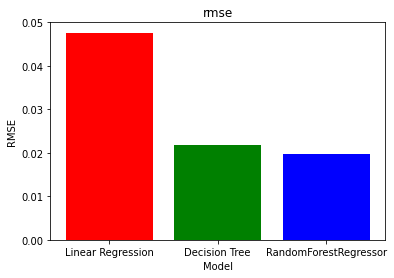

In [47]:
# RMSE adalah Root Mean Square Error
plt.title('rmse')
plt.bar(log['Name'], log['RMSE'], color = ['r','g','b','y'])
plt.xlabel('Model')
plt.ylabel('RMSE')

Random Forest Regressor memiliki performa terbaik dibandingkan dengan R2 Score : 0.978925 RMSE : 0.019842

